In [1]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json


In [2]:
# to communicate with google spreadsheet...
import gspread
from gspread_dataframe import get_as_dataframe
from gspread_dataframe import set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

# establish connection with gogglesheets...
file_data = json.load(open("../../ServiceAccountsKey.json", "r"))
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
PIPA_data = gc.open_by_url("https://docs.google.com/spreadsheets/d/1rV4t0_UV_wcx--UAHVwkqB8Wa_5n9mnpV05yGG1OHqk/edit?usp=sharing")

In [3]:
keywords = ['λυπέω',
            'λυπηρός',
            'λύπη',
            'ἄλγος',
            'ἄλγημα',
            'ἀλγέω',
            'ὀδύνη',
            'ὀδυνάω',
            'πονέω',
            'πόνος']

In [4]:

os.listdir("../data/")

['keyed_vectors_full.wv',
 'c_hippocraticum_enriched.json',
 'keyed_vectors_excl_arist.wv',
 'c_arist_metadata.csv',
 'c_platonicum.json',
 'c_hip_ratios_by_cat_all.png',
 'ids_lines.pickle',
 'large_data',
 'word_freqs_vocabulary.csv',
 'keyed_vectors.wv',
 'c_aristotelicum.json',
 'c_platonicum_repl.json',
 'coin_ocre_deities.csv',
 'vocabulary.pickle',
 'c_aristotelicum_repl.json',
 'matches_pain_words.csv',
 'c_aristotelicum_OVERVIEW.csv',
 'c_hippocraticum_repl.json',
 'keyed_vectors_excl_hipp.wv',
 'keyed_vectors_excl_plato.wv',
 'c_hip_metadata.csv',
 'terms_by_category.csv',
 'word_freqs_all.pickle',
 'c_hippocraticum.json']

In [5]:
most_sim_dfs = []
for fn in ["keyed_vectors_full.wv", "keyed_vectors_excl_arist.wv", "keyed_vectors_excl_plato.wv", "keyed_vectors_excl_hipp.wv"]:
    keyed_vectors = KeyedVectors.load("../data/" + fn)
    mostsimilar_dict = {}
    for keyword in keywords:
        most_similar = [tup[0] + " ({})".format(str(np.round(tup[1], 2))) for tup in keyed_vectors.most_similar(keyword)]
        mostsimilar_dict[keyword] = most_similar
    mostsimilar_df = pd.DataFrame(mostsimilar_dict)
    most_sim_dfs.append(mostsimilar_df)

In [6]:
most_sim_dfs[0]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,χαίρω (0.51),λύπη (0.58),λυπηρός (0.58),τάλας (0.66),ἰξύα (0.75),ὀδυνάω (0.52),θέρμη (0.66),μετάφρενον (0.7),ταλαιπωρέω (0.6),πλησμονή (0.54)
1,εὐφραίνω (0.5),ἡδύς (0.58),ἡδονή (0.57),μέλεος (0.6),ὀδυνάω (0.67),ἀλγεινός (0.49),ἄλγημα (0.65),ἰξύα (0.69),πόνος (0.47),ταλαιπωρία (0.5)
2,ἀκόλαστος (0.49),ἀλγεινός (0.52),ἐπιθυμία (0.57),δύστηνος (0.6),ὑποχόνδριος (0.67),δακρύω (0.48),δίψα (0.63),ὑποχόνδριος (0.69),γυμνάζω (0.44),πονέω (0.47)
3,ἥδομαι (0.49),βλαβερός (0.51),σωματικός (0.53),πότμος (0.57),φρικώδης (0.67),ψαύω (0.46),βήξ (0.62),ἄλγημα (0.67),ἰσχναίνω (0.42),ἀλγηδών (0.46)
4,ἄχθομαι (0.46),ἀηδής (0.48),ἀκολασία (0.51),οἰκτρός (0.56),θέρμη (0.67),βαρύνω (0.46),στραγγουρία (0.61),κενεών (0.65),ταλαιπωρία (0.42),εὐεξία (0.46)
5,δυσχερής (0.46),συζάω (0.47),ἀλγηδών (0.48),πῆμα (0.56),ὀσφῦς (0.67),νείαιρα (0.44),νείαιρα (0.61),ὕφαιμος (0.64),εὐεξία (0.42),ἄλγημα (0.41)
6,λυπηρός (0.46),λυπέω (0.46),θυμός (0.48),τλήμων (0.54),τράχηλος (0.66),παραφρονέω (0.43),ἰξύα (0.58),βουβών (0.64),βαρύνω (0.41),καῦμα (0.41)
7,ἀπολαύω (0.45),ἀπολαύω (0.45),ἐγκράτεια (0.47),τλάω (0.54),κενεών (0.65),φρίκη (0.43),κενεών (0.57),πλευρόν (0.64),διαπονέω (0.41),ἐπίπονος (0.4)
8,κέρδος (0.45),ἐπιθυμία (0.45),Ἀφροδίσιος (0.47),στένω (0.53),ὀδύνη (0.65),ἰξύα (0.42),σπασμός (0.56),ὀδυνώδης (0.63),κουφίζω (0.4),γυμνάσιον (0.4)
9,ἀγανακτέω (0.45),παρουσία (0.44),φθόνος (0.47),πόθος (0.53),βουβών (0.64),ὑποχόνδριος (0.42),φλεγμονή (0.56),νείαιρα (0.63),παραμένω (0.36),φῦσα (0.39)


In [7]:
# excluding Aristotle
most_sim_dfs[1]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,διάκειμαι (0.48),λύπη (0.52),ἐπιθυμία (0.63),τάλας (0.68),ἰξύα (0.76),ὀδυνάω (0.55),ἄλγημα (0.7),μετάφρενον (0.73),ταλαιπωρέω (0.58),ταλαιπωρία (0.5)
1,ἥδομαι (0.47),ἡδύς (0.51),ἡδονή (0.58),δύστηνος (0.66),ὀσφῦς (0.75),βαρύνω (0.5),βήξ (0.69),πνίγω (0.71),πόνος (0.45),πλησμονή (0.5)
2,ἄχθομαι (0.46),λυπέω (0.46),θυμός (0.52),πόθος (0.65),κενεών (0.74),ψαύω (0.48),θέρμη (0.66),ἰξύα (0.71),διαπονέω (0.45),ἀλγηδών (0.45)
3,ἀγανακτέω (0.46),ἀλγεινός (0.45),λυπηρός (0.52),δέρκομαι (0.61),θέρμη (0.73),δακρύω (0.48),δίψα (0.66),βουβών (0.71),γυμνάζω (0.45),πονέω (0.45)
4,εὐφραίνω (0.46),εὐτυχέω (0.44),ἀλγηδών (0.48),πῆμα (0.6),κακοήθης (0.73),ἀλγεινός (0.46),κενεών (0.62),ὕφαιμος (0.7),ταλαιπωρία (0.45),δίψα (0.41)
5,λυπηρός (0.46),εὐφραίνω (0.43),κακία (0.48),μέλεος (0.6),τράχηλος (0.73),ὑποχόνδριος (0.44),νείαιρα (0.62),κατάψυξις (0.69),εὐεξία (0.42),εὐεξία (0.39)
6,πλησιάζω (0.45),ἐλπίς (0.42),ἔρως (0.47),ἄχος (0.59),κατάψυξις (0.71),καρδία (0.43),στραγγουρία (0.61),κενεών (0.68),βαρύνω (0.4),σφοδρός (0.38)
7,παραφρονέω (0.42),ἡδονή (0.42),πενία (0.46),τλήμων (0.59),βουβών (0.71),δάκνω (0.43),φρίκη (0.6),ὑποχόνδριος (0.68),ἀσθενέω (0.39),Ἀφροδίσιος (0.38)
8,ἐξαμαρτάνω (0.42),ἐπιθυμία (0.41),ὁμιλία (0.46),δεῖμα (0.58),ὑποχόνδριος (0.71),πλευρόν (0.43),ἰξύα (0.6),πλευρόν (0.67),ἰσχναίνω (0.39),ἄσκησις (0.38)
9,σιωπάω (0.41),Ἀφροδίσιος (0.41),μανία (0.46),γόος (0.57),ἀσώδης (0.7),ὀδύρομαι (0.43),βουβών (0.58),ὀσφῦς (0.67),ἀναπαύω (0.39),ἄλγος (0.37)


In [8]:
# excluding Plato
most_sim_dfs[2]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,δυσχεραίνω (0.55),λύπη (0.6),λυπηρός (0.6),τάλας (0.69),ἰξύα (0.77),ὀδυνάω (0.53),ἄλγημα (0.69),μετάφρενον (0.75),ταλαιπωρέω (0.6),πλησμονή (0.51)
1,εὐφραίνω (0.54),ἀπολαύω (0.56),ἡδονή (0.58),δύστηνος (0.64),τράχηλος (0.74),ψαύω (0.48),βήξ (0.66),ἰξύα (0.75),ταλαιπωρία (0.46),ταλαιπωρία (0.47)
2,ἄχθομαι (0.52),ἡδύς (0.55),σωματικός (0.58),ἀλγεινός (0.63),ὀσφῦς (0.73),βαρύνω (0.47),θέρμη (0.66),βουβών (0.74),πόνος (0.45),πονέω (0.45)
3,ἀγανακτέω (0.51),ἐπιθυμία (0.54),ἐπιθυμία (0.55),πῆμα (0.63),θέρμη (0.71),ὑποχόνδριος (0.45),νείαιρα (0.62),κενεών (0.73),ἰσχναίνω (0.43),ἄλγημα (0.43)
4,ἀκόλαστος (0.5),βλαβερός (0.51),ἀκόλαστος (0.53),μέλεος (0.59),ὀδυνάω (0.71),δακρύω (0.44),ὀδυνάω (0.6),ὑποχόνδριος (0.72),γυμνάζω (0.43),ἄλγος (0.42)
5,χαίρω (0.5),φοβερός (0.5),εὐφραίνω (0.52),πόθος (0.59),κενεών (0.71),ἐμφύω (0.44),δίψα (0.6),ἄλγημα (0.71),διαπονέω (0.43),φῦσα (0.42)
6,λοιδορέω (0.49),ἀκούσιος (0.49),ἔρως (0.52),τλάω (0.56),ὀδυνώδης (0.7),ἀσώδης (0.44),ὀσφῦς (0.6),τράχηλος (0.7),εὐεξία (0.42),εὐεξία (0.39)
7,σύνοιδα (0.48),θαρσαλέος (0.49),ἐγκράτεια (0.51),ἄχθος (0.56),ὀδύνη (0.69),ἄλγημα (0.43),κενεών (0.59),ὀσφῦς (0.69),βαρύνω (0.42),ὕπνος (0.39)
8,ὀργίζω (0.48),δυσχεραίνω (0.48),αἰδώς (0.51),τλήμων (0.55),φρικώδης (0.69),ἰξύα (0.43),ἰξύα (0.59),ὕφαιμος (0.68),ἀλγέω (0.4),περίπατος (0.36)
9,ἥδομαι (0.48),πενία (0.47),κακία (0.51),γόος (0.55),βουβών (0.68),τράχηλος (0.43),βουβών (0.59),πλευρόν (0.68),πλησιάζω (0.38),δίψα (0.36)


In [9]:
# excluding Hippocrates
most_sim_dfs[3]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,χαίρω (0.53),λύπη (0.62),λυπηρός (0.62),ἄχος (0.67),ὀσφῦς (0.79),ἀλγεινός (0.56),ἕλκος (0.74),φυράω (0.55),ταλαιπωρέω (0.49),πονέω (0.47)
1,ἥδομαι (0.52),ἀλγεινός (0.56),ἀλγηδών (0.61),πῆμα (0.66),ῥάχις (0.79),δακρύω (0.56),ἑλκόω (0.68),διαθερμαίνω (0.54),γυμνάζω (0.47),ῥώμη (0.44)
2,λυπηρός (0.52),ἡδύς (0.55),ἐπιθυμία (0.6),δύστηνος (0.63),κνήμη (0.78),ὀδύρομαι (0.55),φόνιος (0.67),ῥῖγος (0.52),πόνος (0.47),εὐεξία (0.44)
3,ἀλγέω (0.52),βλαβερός (0.52),ἡδονή (0.57),τάλας (0.62),χόνδρος (0.74),λυπέω (0.52),ἧπαρ (0.66),δακρύω (0.52),δαπανάω (0.47),πλησμονή (0.43)
4,ἀκόλαστος (0.5),λυπέω (0.52),Ἀφροδίσιος (0.54),μέλεος (0.62),τράχηλος (0.74),λυπηρός (0.51),πλευρόν (0.63),βλέφαρον (0.52),ῥᾳστώνη (0.43),ἀλκή (0.43)
5,ἀπολαύω (0.49),ἀλγέω (0.51),σωματικός (0.52),τλάω (0.61),βουβών (0.74),εὐφραίνω (0.48),κράς (0.62),πλήσσω (0.52),διαπονέω (0.43),πενία (0.41)
6,εὐφραίνω (0.48),συζάω (0.47),ἀκολασία (0.52),ἄτη (0.61),σφυρόν (0.73),οἰκτρός (0.48),ἄτη (0.61),πυός (0.51),καρτερέω (0.43),φόβος (0.41)
7,ἄχθομαι (0.47),ἀναίσθητος (0.47),θυμός (0.51),τλήμων (0.6),σαρκώδης (0.72),ἀκόλαστος (0.47),κρόταφος (0.61),σίαλον (0.49),εὐεξία (0.41),ἐπίπονος (0.4)
8,ἀκρατής (0.47),παρουσία (0.46),ἀκρασία (0.51),πόθος (0.6),στῆθος (0.72),θυμόω (0.46),κλείς (0.61),βαρύνω (0.49),ῥᾳθυμία (0.41),μόχθος (0.4)
9,ὀργίζω (0.46),ἀηδής (0.46),ἐγκράτεια (0.48),δεῖμα (0.6),ῥαφή (0.72),ἄλγος (0.46),νῆστις (0.6),ὀδύνη (0.49),ἐμποδίζω (0.4),βίοτος (0.39)


In [24]:
#set_with_dataframe(PIPA_data.add_worksheet("mostsimilar", 1,1), mostsimilar_df)

In [10]:
def get_sim_matrix(keyed_vectors, words):
    df = pd.DataFrame(cosine_similarity(keyed_vectors[words]), columns=words, index=words)
    return df

In [11]:
sim_matrices = []
for fn in ["keyed_vectors_full.wv", "keyed_vectors_excl_arist.wv", "keyed_vectors_excl_plato.wv", "keyed_vectors_excl_hipp.wv"]:
    keyed_vectors = KeyedVectors.load("../data/" + fn)
    sim_matrix = get_sim_matrix(keyed_vectors, keywords).round(2)
    sim_matrices.append(sim_matrix)

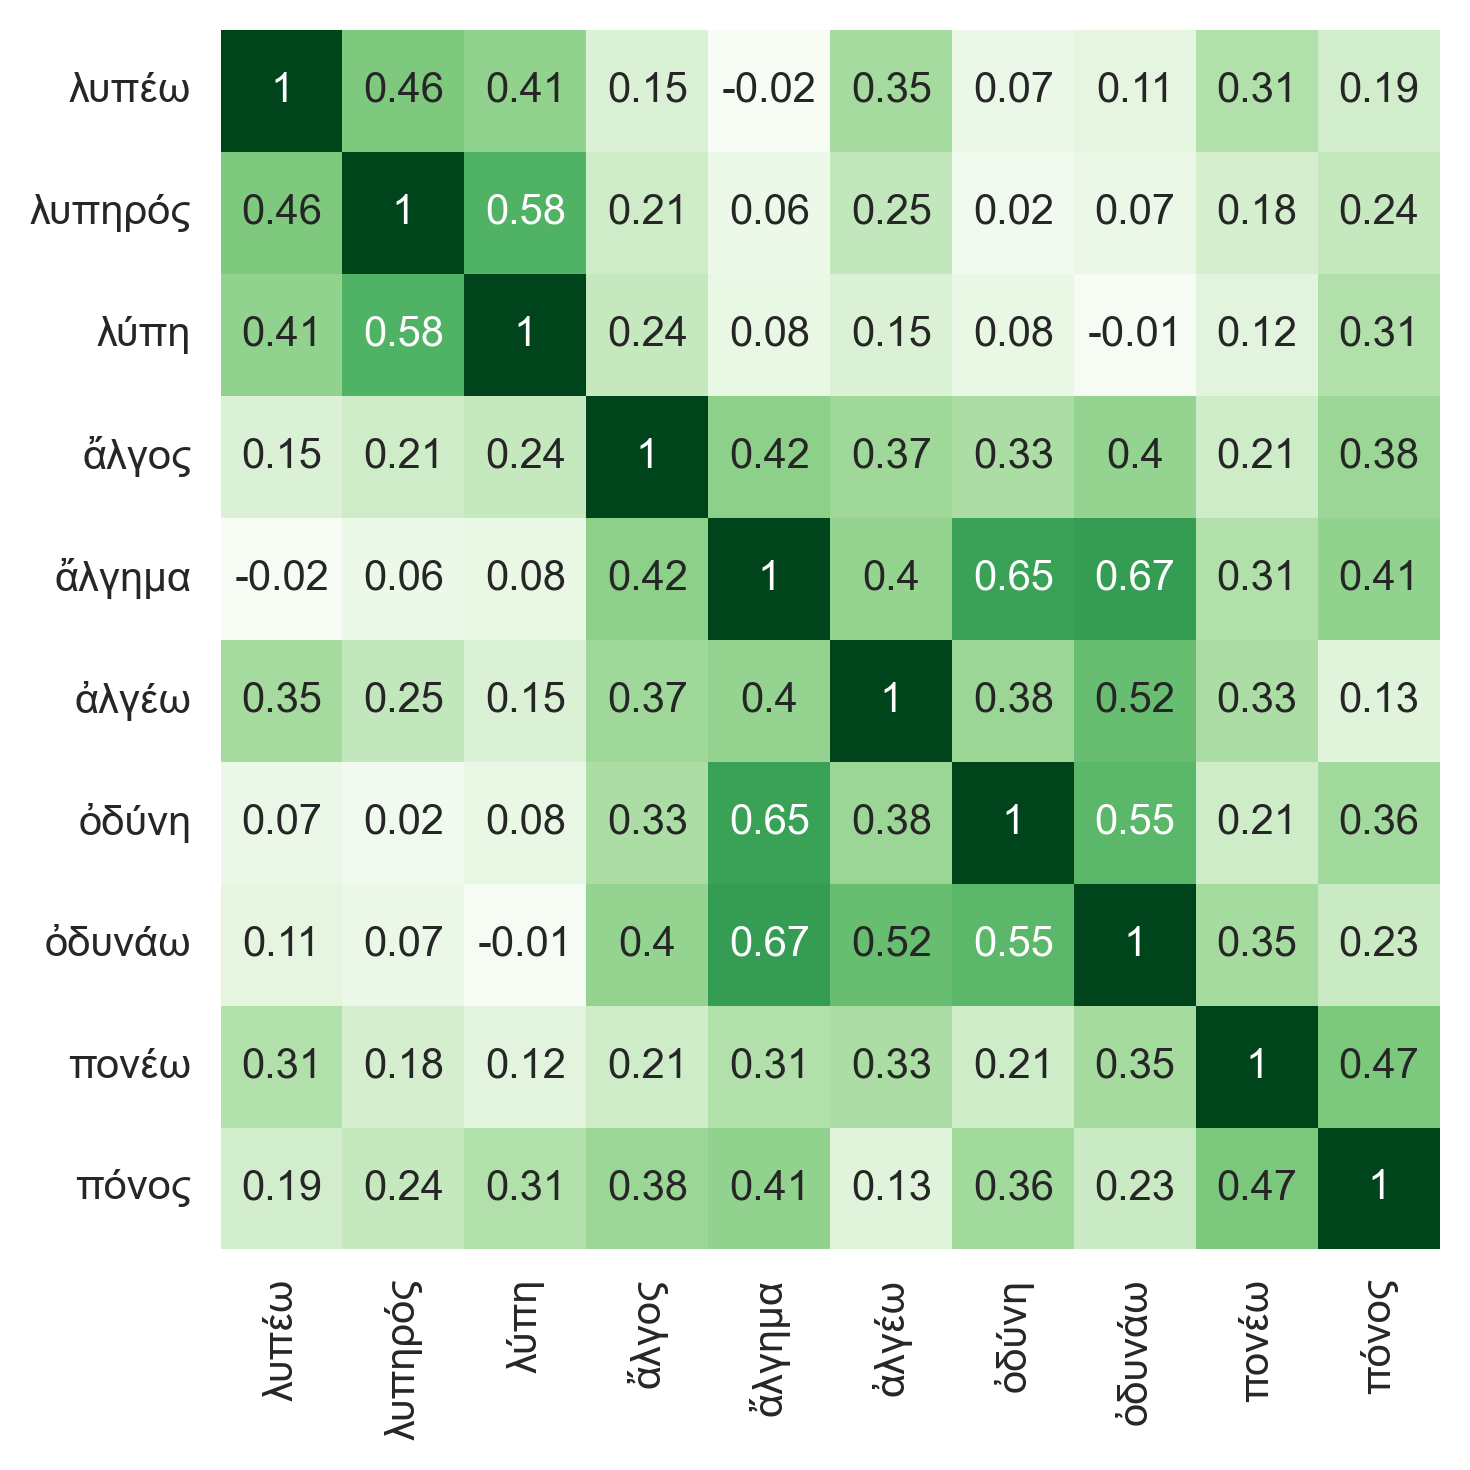

In [13]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300, tight_layout=True)
sns.heatmap(sim_matrices[0], annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

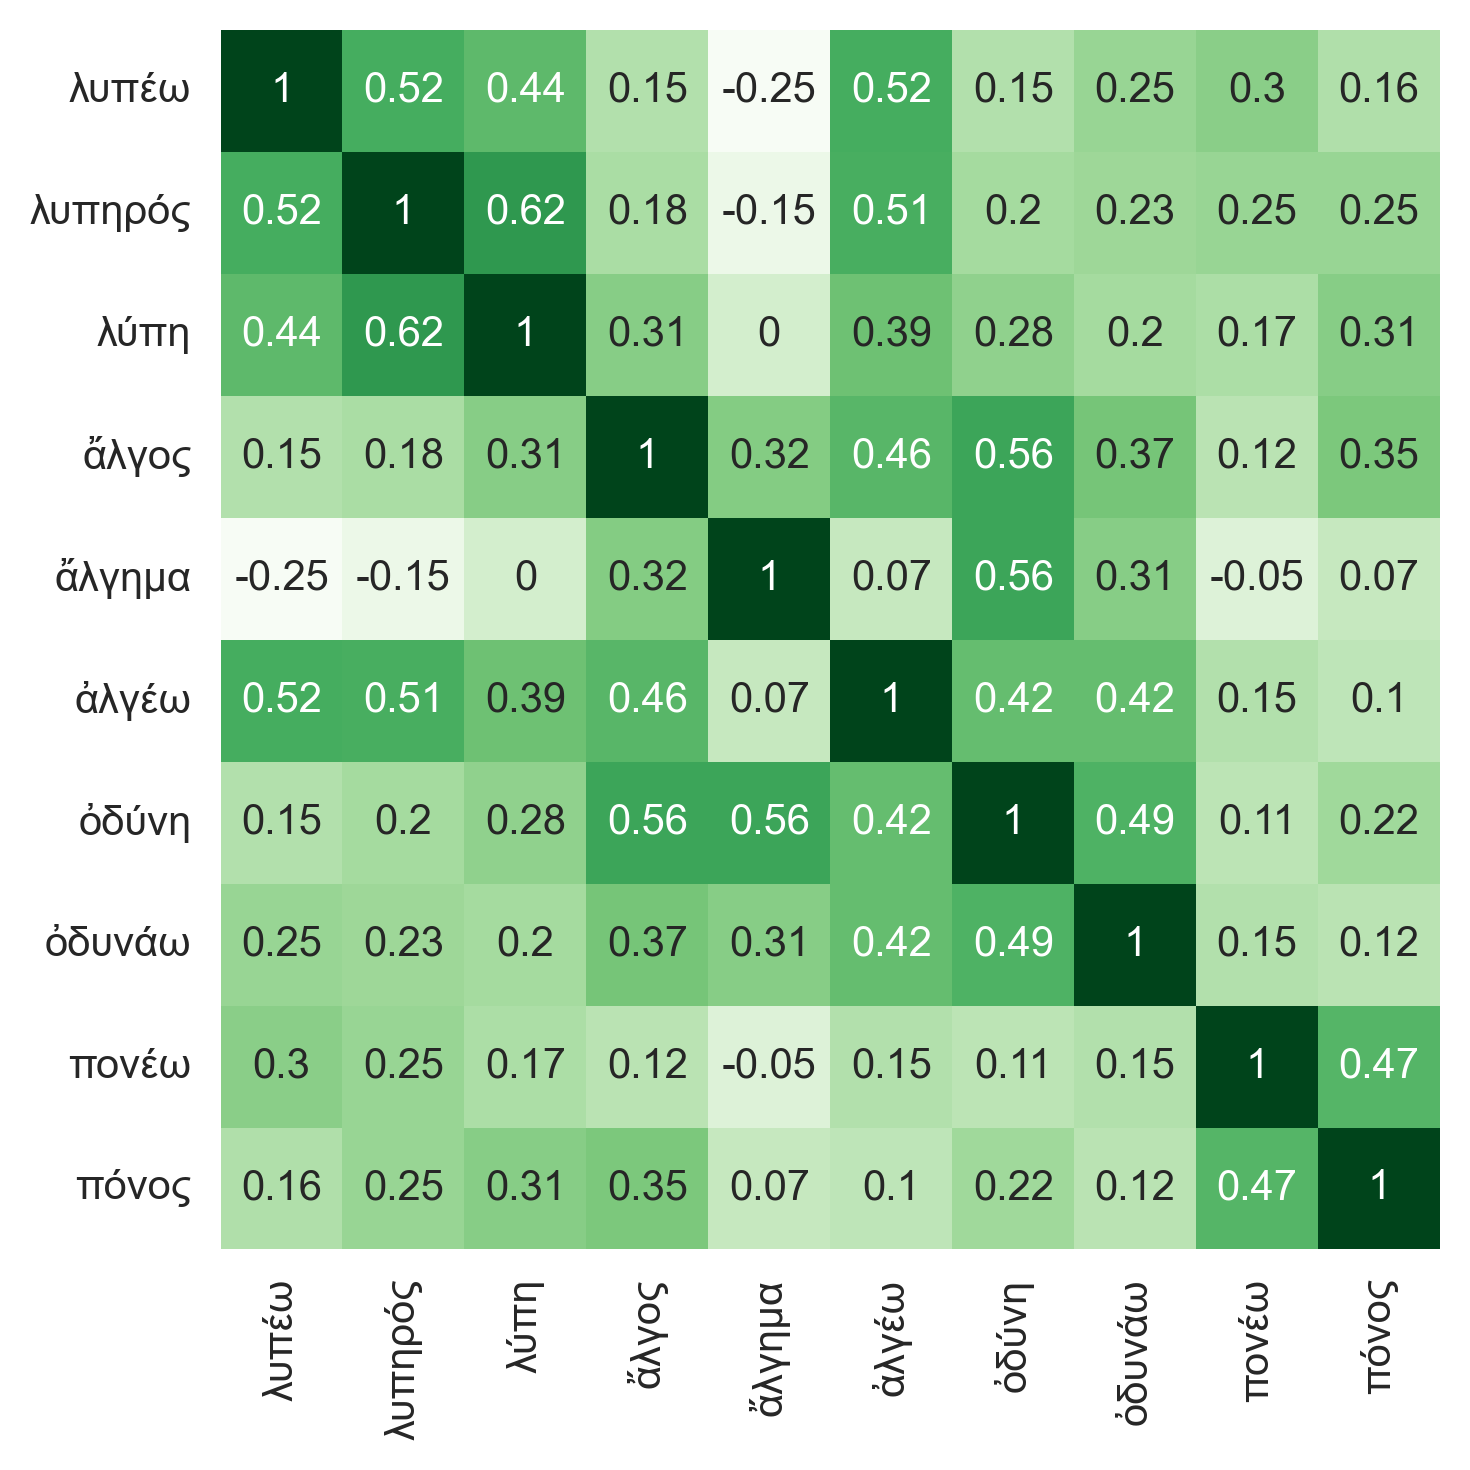

In [14]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300, tight_layout=True)
sns.heatmap(sim_matrices[3], annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

In [15]:
titles = ["full", "excl. Arist.", "excl. Plato", "excl. Hipp."]

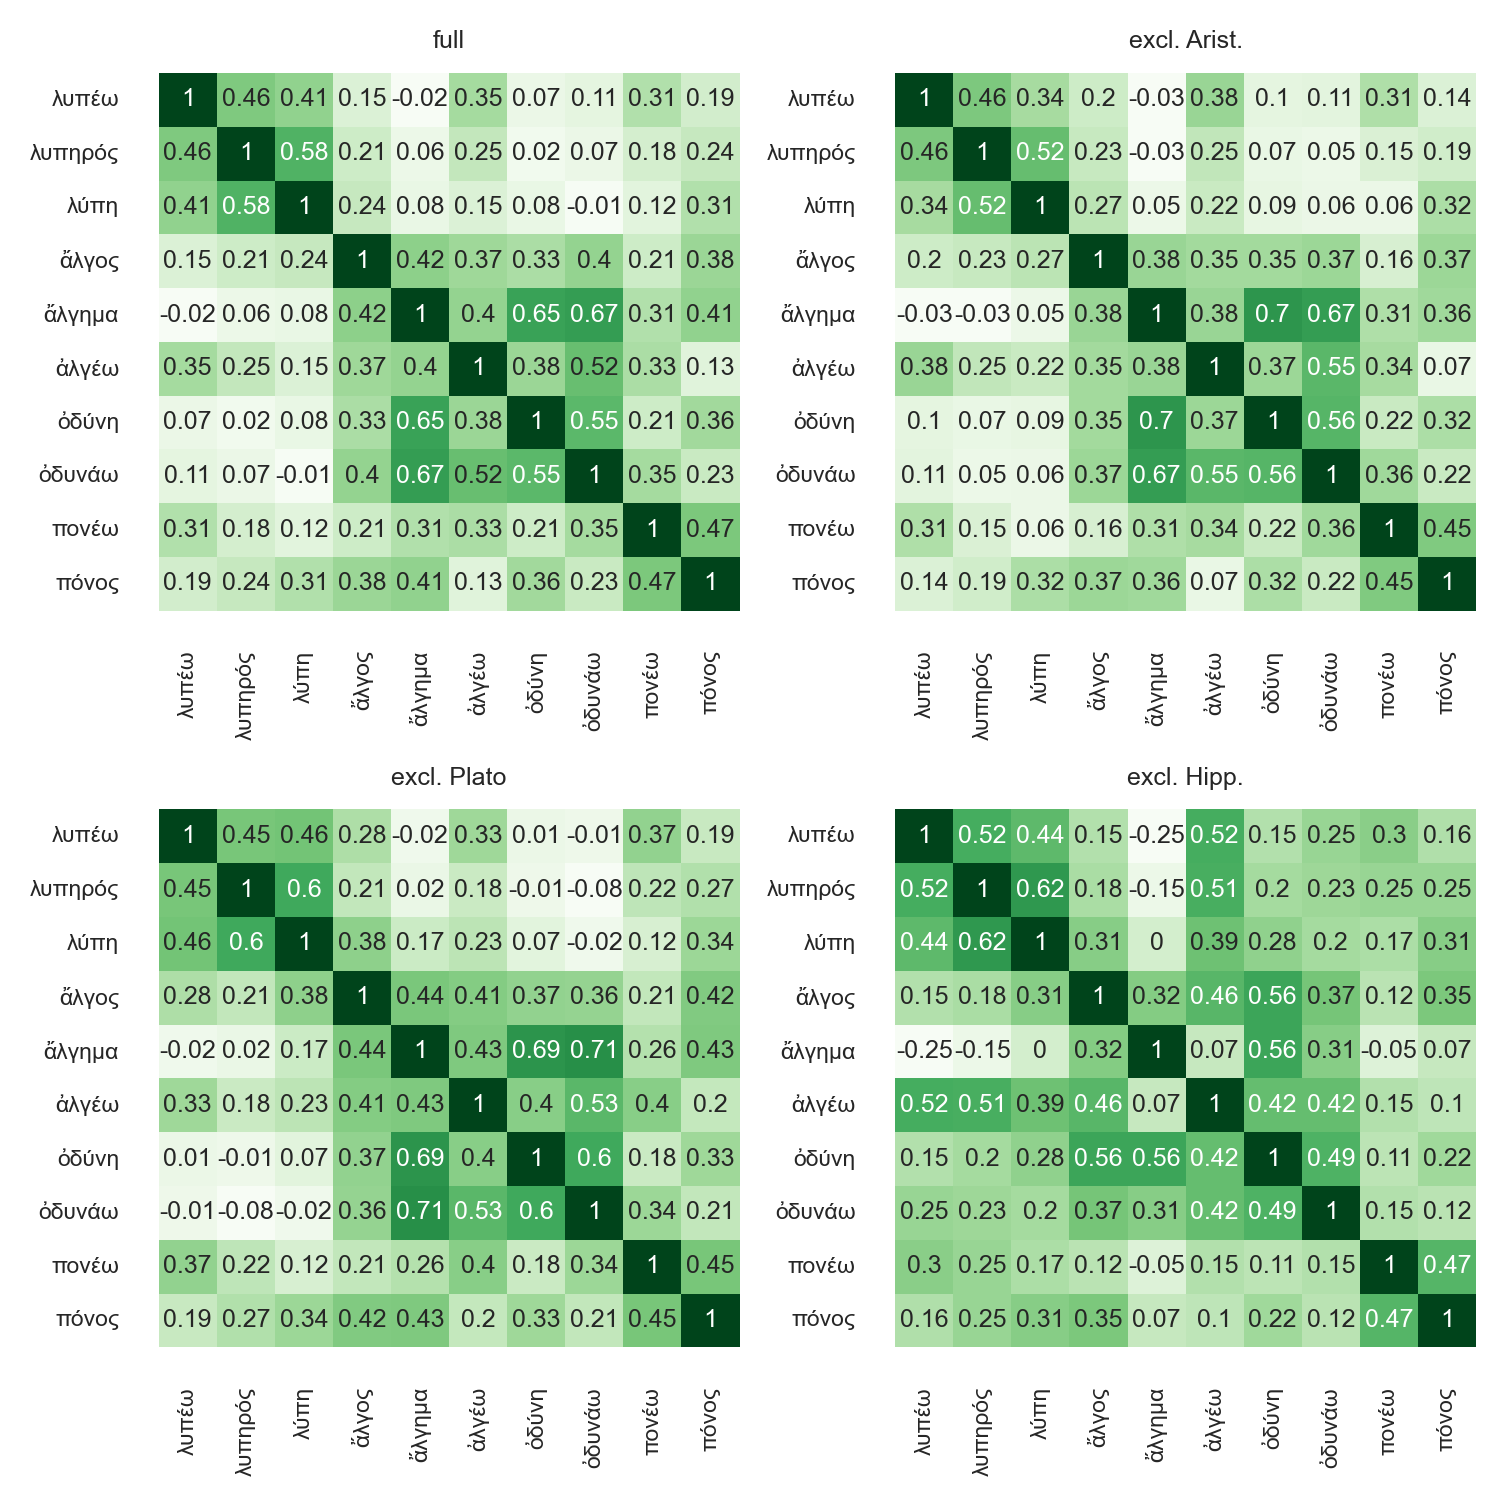

In [18]:
sns.set(font_scale=0.5)
fig, axs = plt.subplots(2,2, figsize=(5, 5), dpi=300, tight_layout=True)
for sim_matrix, ax, title in zip(sim_matrices, axs.ravel(), titles):
    sns.heatmap(sim_matrix, annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
    ax.set_title(title)
    ax.set_ylabel("")
    ax.set_xlabel("")
    #plt.show()

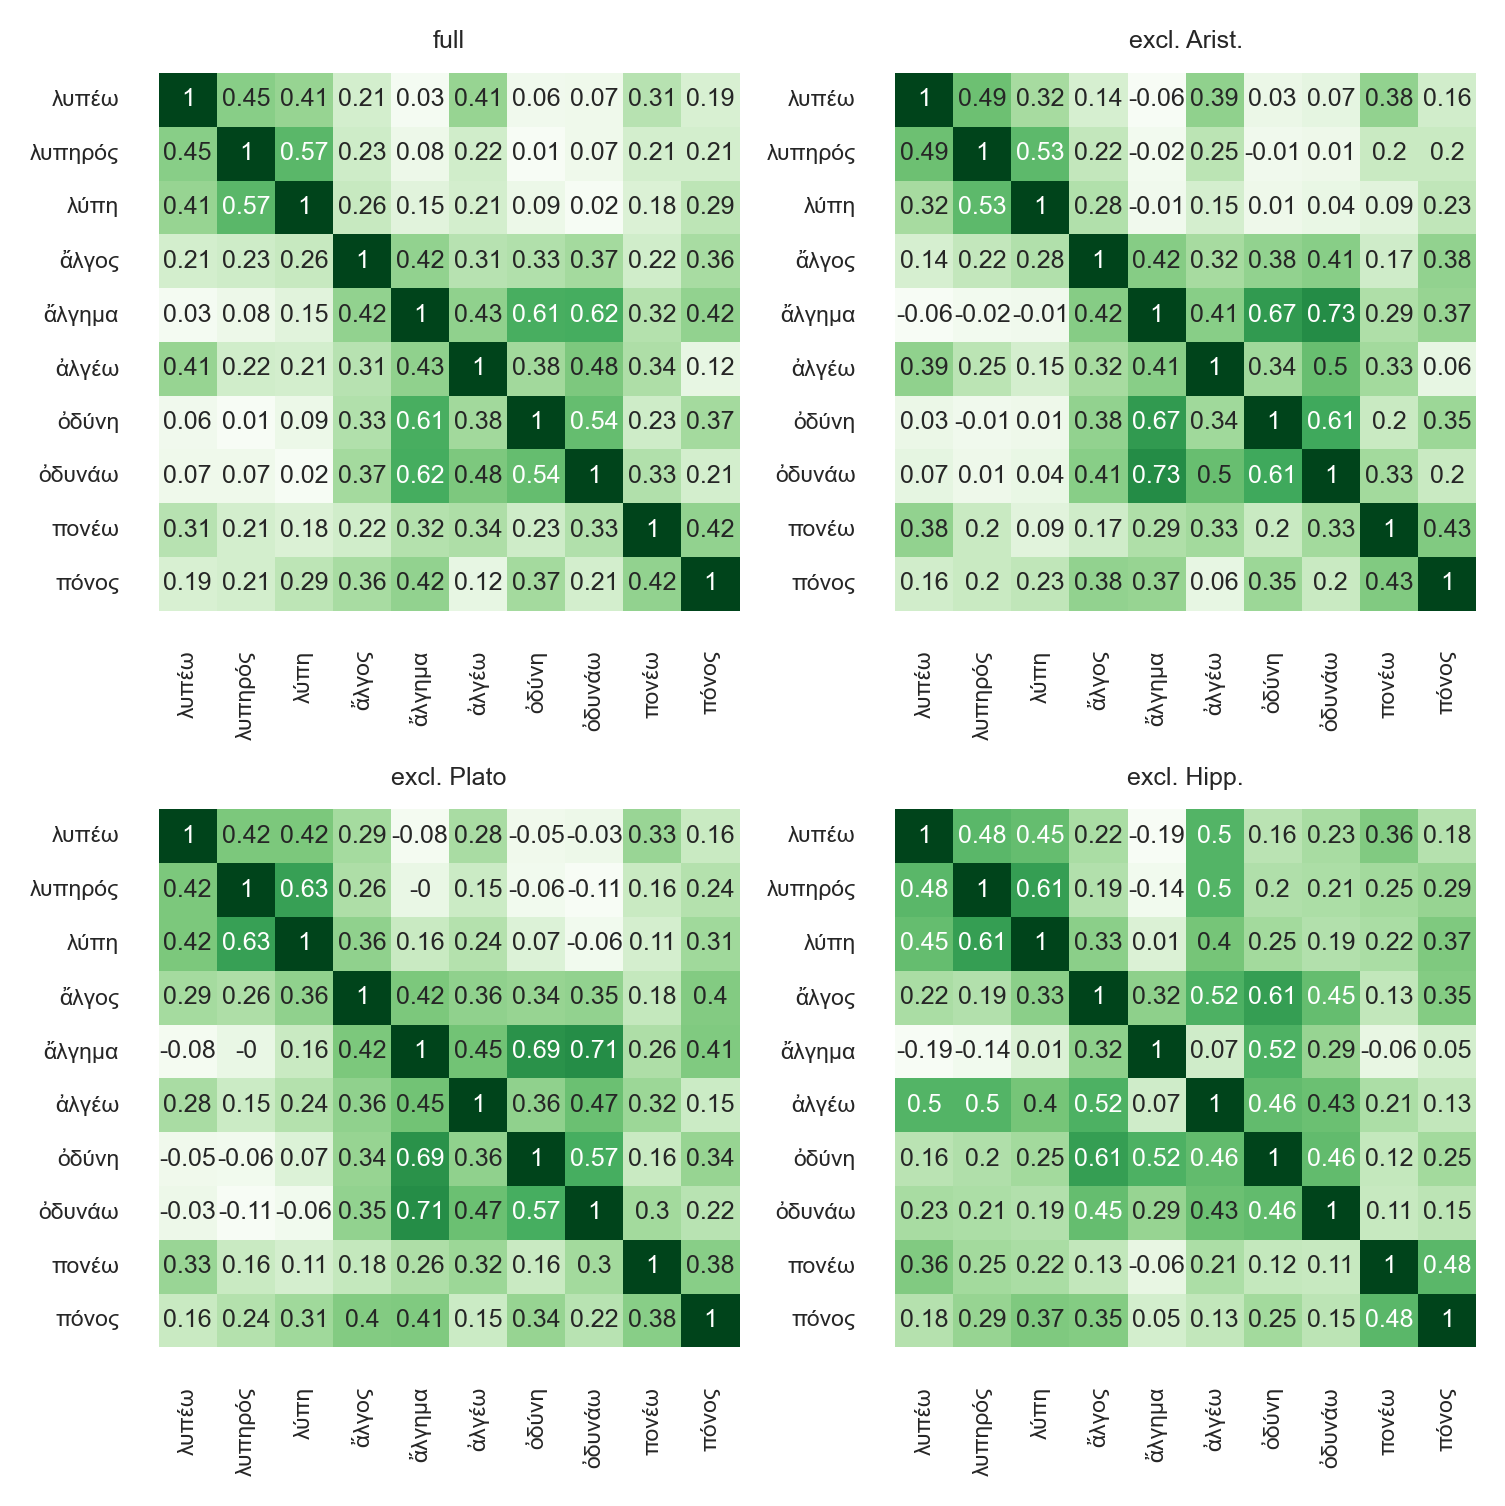

In [27]:
fig, axs = plt.subplots(2,2, figsize=(5, 5), dpi=300, tight_layout=True)
sns.set(font_scale=0.5)
for sim_matrix, ax, title in zip(sim_matrices, axs.ravel(), titles):
    sns.heatmap(sim_matrix, annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
    ax.set_title(title)
    ax.set_ylabel("")
    ax.set_xlabel("")
    #plt.show()

In [19]:
sim_diff_excl_arist = (sim_matrices[1] - sim_matrices[0]).apply(abs).round(2)
sim_diff_excl_arist

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
λυπέω,0.00,0.00,0.07,0.05,0.01,0.03,0.03,0.00,0.00,0.05
λυπηρός,0.00,0.00,0.06,0.02,0.09,0.00,0.05,0.02,0.03,0.05
λύπη,0.07,0.06,0.00,0.03,0.03,0.07,0.01,0.07,0.06,0.01
ἄλγος,0.05,0.02,0.03,0.00,0.04,0.02,0.02,0.03,0.05,0.01
ἄλγημα,0.01,0.09,0.03,0.04,0.00,0.02,0.05,0.00,0.00,0.05
ἀλγέω,0.03,0.00,0.07,0.02,0.02,0.00,0.01,0.03,0.01,0.06
ὀδύνη,0.03,0.05,0.01,0.02,0.05,0.01,0.00,0.01,0.01,0.04
ὀδυνάω,0.00,0.02,0.07,0.03,0.00,0.03,0.01,0.00,0.01,0.01
πονέω,0.00,0.03,0.06,0.05,0.00,0.01,0.01,0.01,0.00,0.02
πόνος,0.05,0.05,0.01,0.01,0.05,0.06,0.04,0.01,0.02,0.00


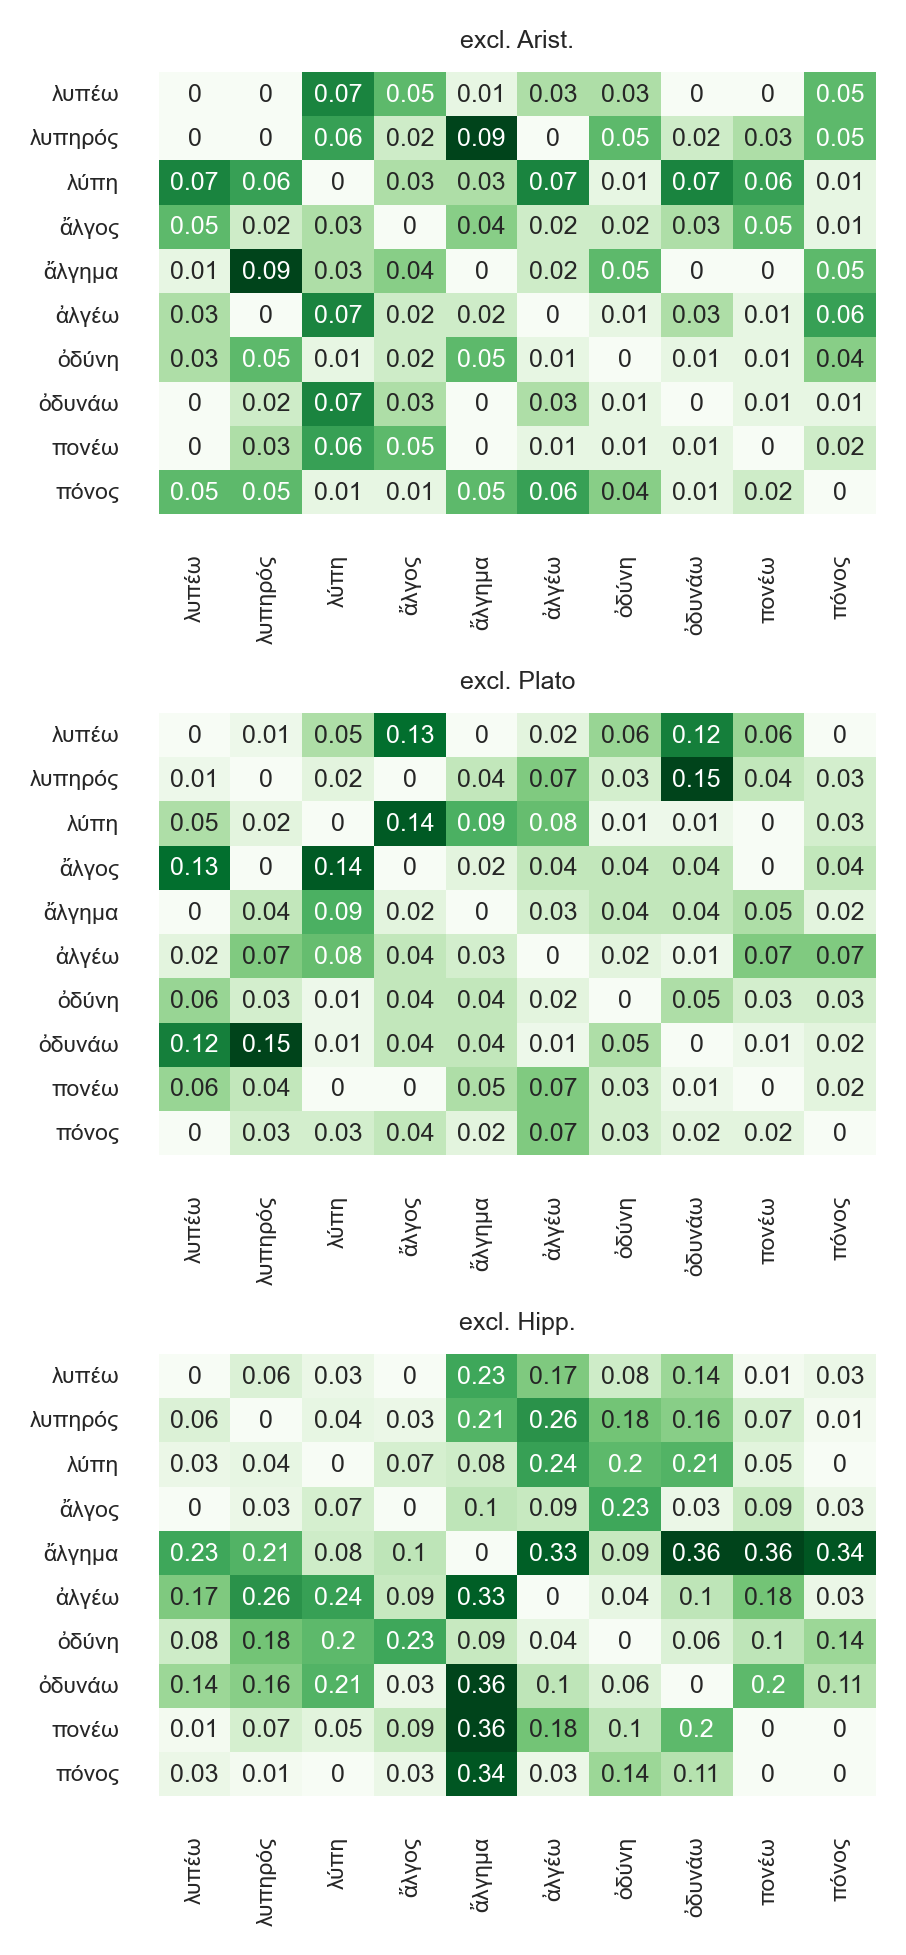

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(3, 6.5), dpi=300, tight_layout=True)

for sim_matrix, ax, title in zip(sim_matrices[1:], axs.ravel(), titles[1:]):
    sim_diff_excl = (sim_matrix - sim_matrices[0]).apply(abs).round(2)
    sns.heatmap(sim_diff_excl, annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
    ax.set_title(title)
    ax.set_ylabel("")
    ax.set_xlabel("")

# Comparing all-vector similarities

In [22]:
for fn in ["keyed_vectors_full.wv", "keyed_vectors_excl_arist.wv", "keyed_vectors_excl_plato.wv", "keyed_vectors_excl_hipp.wv"]:
    keyed_vectors = KeyedVectors.load("../data/" + fn)

In [23]:
keyed_vectors_full = KeyedVectors.load("../data/keyed_vectors_full.wv")
keyed_vectors_excl_arist = KeyedVectors.load("../data/keyed_vectors_excl_arist.wv")
keyed_vectors_excl_plato = KeyedVectors.load("../data/keyed_vectors_excl_plato.wv")
keyed_vectors_excl_hipp = KeyedVectors.load("../data/keyed_vectors_excl_hipp.wv")
vectors_list = [keyed_vectors_full, keyed_vectors_excl_arist, keyed_vectors_excl_plato, keyed_vectors_excl_hipp]

In [24]:
n_words = len(keyed_vectors_full)
complete_sim_matrices = []
for vecs in vectors_list:
    complete_sim_matrix = cosine_similarity(vecs.vectors)
    complete_sim_matrices.append(complete_sim_matrix[:n_words, :n_words])

In [25]:
full_arist_absdiff_sums = np.absolute(np.subtract(complete_sim_matrices[0], complete_sim_matrices[1]).round(4)).sum(axis=1)
full_plato_absdiff_sums = np.absolute(np.subtract(complete_sim_matrices[0], complete_sim_matrices[2]).round(4)).sum(axis=1)
full_hipp_absdiff_sums = np.absolute(np.subtract(complete_sim_matrices[0], complete_sim_matrices[3]).round(4)).sum(axis=1)

In [26]:
# n of words with their meaning most significantly affected by exclusion of Aristotle
n = 100
[(keyed_vectors_full.index_to_key[tup[0]], tup[1]) for tup in sorted(enumerate(full_arist_absdiff_sums), key=lambda x:x[1], reverse=True)][:n]


[('ἀντίκειμαι', 789.99426),
 ('ἠθικός', 775.4143),
 ('πρακτός', 754.3089),
 ('μεσότης', 753.40356),
 ('βράγχιον', 747.1899),
 ('ἀντίφασις', 701.5315),
 ('ἐπιστητός', 699.85254),
 ('ἐφαρμόζω', 699.48975),
 ('ὁρισμός', 694.557),
 ('ἐνεργέω', 667.23425),
 ('ζῳοτόκος', 662.0913),
 ('πτῶσις', 660.14575),
 ('ἄφθαρτος', 641.451),
 ('στιγμή', 626.73926),
 ('ἔνστασις', 621.6515),
 ('ἀντιστρέφω', 616.35266),
 ('ποσός', 612.7389),
 ('συμπέρασμα', 604.8902),
 ('ἀνασκευάζω', 584.60986),
 ('πρόβλημα', 583.5867),
 ('ποιότης', 582.5942),
 ('ἐπαινετός', 569.6222),
 ('συζάω', 558.851),
 ('συμβεβηκός', 551.0022),
 ('στέρησις', 544.2178),
 ('ἐνυπάρχω', 541.2484),
 ('χωριστός', 534.2356),
 ('ἀναθυμίασις', 532.7761),
 ('ὀχεία', 528.11926),
 ('ἀνάλογος', 526.7318),
 ('μίξις', 522.5806),
 ('πρακτικός', 519.9444),
 ('δεκτικός', 517.92944),
 ('ἀδιαίρετος', 517.5709),
 ('γεῦσις', 517.14685),
 ('ἔντομος', 510.09448),
 ('θρεπτικός', 506.9578),
 ('μονάς', 503.9576),
 ('ἐπαγωγή', 501.522),
 ('ἐπιζητέω', 500.38553),


In [29]:
# n of words with their meaning most significantly affected by exclusion of Plato
n = 100
[(keyed_vectors_full.index_to_key[tup[0]], tup[1]) for tup in sorted(enumerate(full_plato_absdiff_sums), key=lambda x:x[1], reverse=True)][:n]

[('Φαῖδρος', 719.0823),
 ('Ἔρως', 697.21716),
 ('Πῶλος', 694.1955),
 ('Κέβης', 688.75305),
 ('Κτήσιππος', 687.3594),
 ('Σιμμίας', 673.8013),
 ('Πρώταρχος', 670.97705),
 ('ἐπονομάζω', 527.07587),
 ('Θεαίτητος', 509.43982),
 ('πειθώ', 472.7054),
 ('ἐφάπτω', 468.6832),
 ('Παρμενίδης', 464.4056),
 ('ἀπεικάζω', 461.23383),
 ('Κλεινίας', 444.4493),
 ('προσλέγω', 423.2698),
 ('κομψός', 420.6741),
 ('Καλλικλῆς', 420.4099),
 ('ἀνευρίσκω', 420.3903),
 ('Δίων', 417.284),
 ('συνέπομαι', 414.3379),
 ('Γοργίας', 413.9253),
 ('Θεόδωρος', 410.8352),
 ('κατάδηλος', 409.9587),
 ('συνδέω', 409.7318),
 ('νομοφύλαξ', 395.4181),
 ('γεύω', 395.0548),
 ('ῥητορική', 391.87122),
 ('Θρασύμαχος', 391.68323),
 ('σύμφημι', 390.4448),
 ('ἀγέλη', 388.4635),
 ('ἔμφρων', 379.8616),
 ('Διονυσόδωρος', 376.69342),
 ('λύρα', 375.5451),
 ('ἀναφαίνω', 374.5664),
 ('Ἑρμογένης', 372.5254),
 ('κατοράω', 371.4179),
 ('Μένων', 370.61993),
 ('Ἀδείμαντος', 368.96948),
 ('Πρόδικος', 366.7807),
 ('Λάχης', 366.2345),
 ('Μέλητος', 365.

In [30]:
# n of words with their meaning most significantly affected by exclusion of Aristotle
n = 100
[(keyed_vectors_full.index_to_key[tup[0]], tup[1]) for tup in sorted(enumerate(full_hipp_absdiff_sums), key=lambda x:x[1], reverse=True)][:n]

[('χλιερός', 767.62573),
 ('διαχωρητικός', 736.02344),
 ('τρομώδης', 681.7225),
 ('λινοζῶστις', 672.2013),
 ('ὀδυνώδης', 655.93396),
 ('νέτωπον', 645.71875),
 ('σπασμώδης', 640.1763),
 ('ὀλέθριος', 639.1188),
 ('ὑποστροφή', 633.65173),
 ('πουλλός', 626.1896),
 ('κατάτασις', 614.6317),
 ('διψώδης', 612.7696),
 ('ὑποθυμιάω', 592.08),
 ('θέρμη', 576.95374),
 ('ἄλητον', 576.55994),
 ('οὖρον', 574.255),
 ('περιπλευμονία', 573.027),
 ('αὔτεος', 572.0779),
 ('τούτεον', 568.8782),
 ('αἱμορραγέω', 564.1807),
 ('φρενιτικός', 558.4421),
 ('ῥόδινος', 554.3459),
 ('κωματώδης', 551.5083),
 ('ἤρ', 547.683),
 ('πυρεταίνω', 544.73334),
 ('καταπλάσσω', 544.2178),
 ('καυσώδης', 540.146),
 ('πτύω', 534.7651),
 ('βληχρός', 531.6731),
 ('ἀσώδης', 530.6793),
 ('ἐπιμήνιος', 530.4217),
 ('Ὁκότης', 529.8264),
 ('αἱμορραγία', 526.7011),
 ('ὁδοιπορέω', 526.29663),
 ('σίαλον', 524.1443),
 ('προσθετός', 521.08496),
 ('ὕδρωψ', 513.43097),
 ('ἀρχός', 510.4554),
 ('καῦσος', 510.4187),
 ('ἑψέω', 507.98492),
 ('πτισάνη'